### EE 421/521 Image Processing

## Project 2 - Image Enhancement

#### Submission deadline: 26 February 2024

In this project, you will implement the following:

1. Histogram calculation
2. Histrogram equalization for image enhancement
3. Histogram matching

Make sure to submit both .ipynb and .html files.

**This project will be graded for both EE 421 (HW1) and EE 521 (HW1) students.**

*Copyright (c) 2020-2022 by Arif Tanju Erdem*

************************************
Emirhan Benderli
************************************

In [ ]:
# STEP 0 Import the necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# histogram calculation
from skimage import exposure

# displaying images and plots
import matplotlib.pyplot as plt

# array operations
import numpy as np

# Mount Google Drive folder to Colab
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
# my function to convert to lumincance, round to nearest integer,
# truncate to range [0, 255], and then set data type to uint8

def my_imgLuminance(imgRGB):

    # make sure it is a color image
    assert imgRGB.shape[2] == 3

    # get the luminance data
    imgLum = color.rgb2gray(imgRGB)

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')

    return imgLum

# end of function

In [ ]:
# my function to convert float image data from range [0, 1] to range [0, 255],
# and then set data type to uint8

def my_float2int(img):

    img = np.round(img * 255, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')

    return img

# end of function

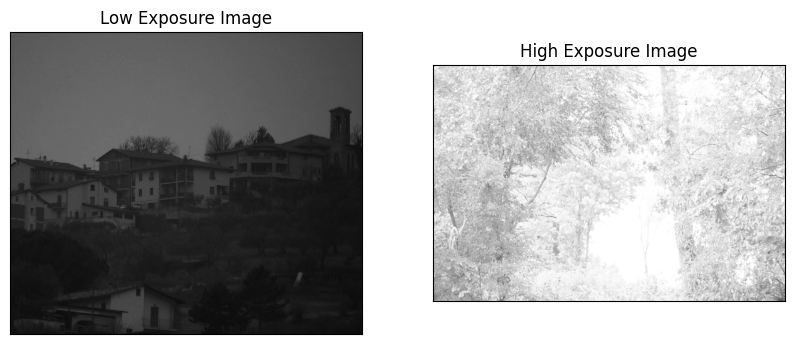

In [ ]:
# STEP 1 Pick two different images, one with low exposure (i.e., a dark image)
# and one with high exposure (i.e., a bright image). Find and display their luminance.

# set YOUR image folder
image_folder = r'/content/drive/MyDrive/EE421/Project2'

# read YOUR under exposed image
image_file = r'/under_exposed.jpg'
image_path = image_folder + image_file
imgRGB_low = io.imread(image_path)

# read YOUR over exposed image
image_file = r'/over_exposed.jpg'
image_path = image_folder + image_file
imgRGB_high = io.imread(image_path)

# calculate the luminance image
img_low = my_imgLuminance(imgRGB_low)
img_high = my_imgLuminance(imgRGB_high)

# display both images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

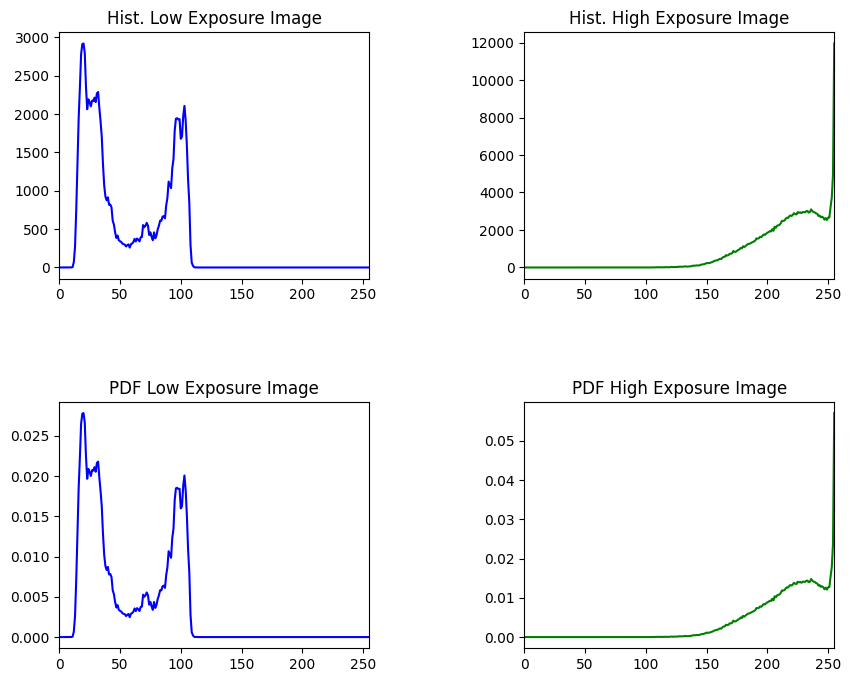

In [ ]:
# ==================================
# (1) Histogram calculation
# ==================================

# ADD YOUR CODE HERE

# 1.1 write a function to calculate the histogram of an image
def calcHistogram( img):

    # calculate histogram here
    assert img.ndim == 2
    histogram = np.zeros(256)
    for p in img.reshape(-1):
        histogram[p] += 1

    return histogram

# end of function

# 1.2 calculate the histograms using the above function
histLow = calcHistogram(img_low)
histHıgh = calcHistogram(img_high)

# 1.3 calculate the pdf's
pdfLow = histLow/histLow.sum()
pdfHıgh = histHıgh/histHıgh.sum()

# 1.4 display the histograms and pdf's
plt.figure(figsize=(10,8))

plt.subplot(221), plt.plot(histLow,'blue')
plt.xlim(0, 255)
plt.title('Hist. Low Exposure Image')

plt.subplot(223), plt.plot(pdfLow,'blue')
plt.xlim(0, 255)
plt.title('PDF Low Exposure Image')

plt.subplot(222), plt.plot(histHıgh,'green')
plt.xlim(0, 255)
plt.title('Hist. High Exposure Image')

plt.subplot(224), plt.plot(pdfHıgh,'green')
plt.xlim(0, 255)
plt.title('PDF High Exposure Image')

plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()
plt.close()

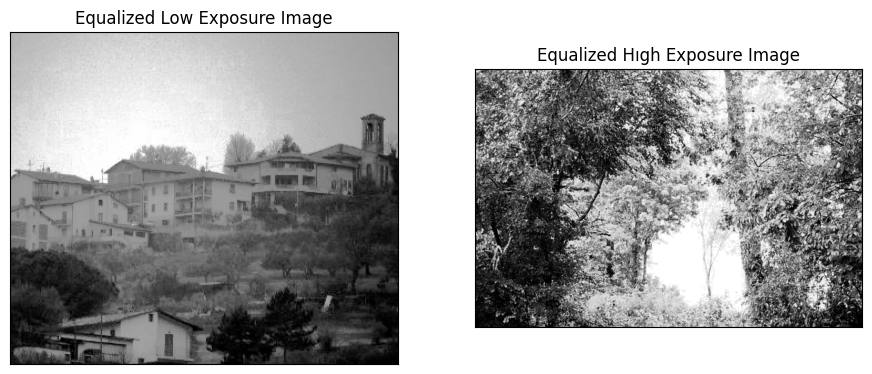

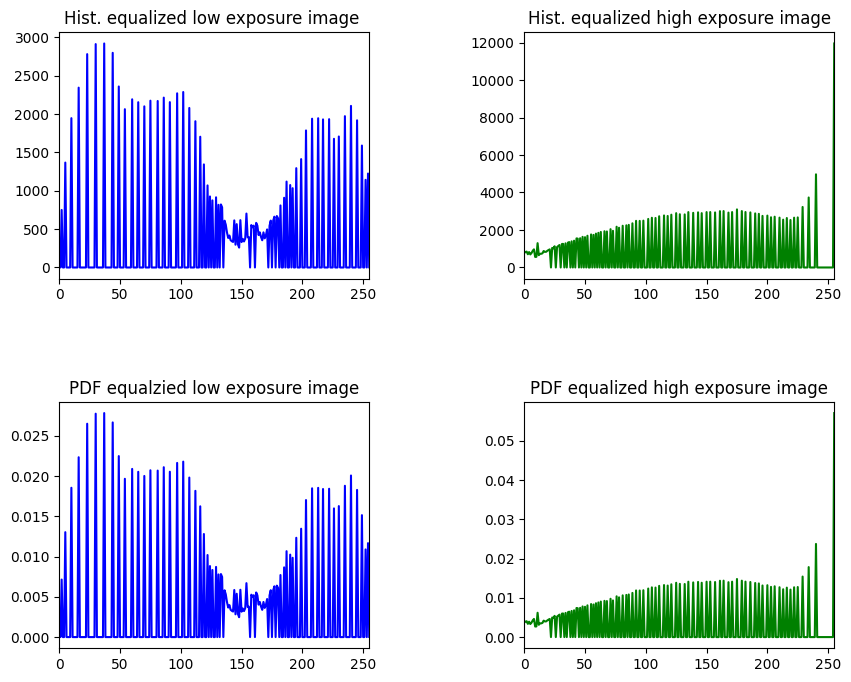

In [ ]:
# ===============================
# (2) Histrogram equalization
# ===============================

# ADD YOUR CODE HERE

# 2.1 write a function to equalize the histogram of an image
def equalizeHistogram( img):

    # calculate histogram equalized image here
    histogram=calcHistogram(img)
    cdf = np.cumsum(histogram)

    # Normalize the CDF to the range [0, 255]
    cdfNormalized= (cdf-cdf.min())*255/(cdf.max()-cdf.min())
    mappingFunc= np.interp(img.flatten(), range(256), cdfNormalized)
    imgEqualized= np.reshape(mappingFunc,img.shape).astype('uint8')


    return imgEqualized




# end of function

# 2.2 obtain the histogram equalized images using the above function
imgLow_eq = equalizeHistogram(img_low)
imgHigh_eq = equalizeHistogram(img_high)

plt.figure(figsize=(11,11))
plt.subplot(121), plt.imshow(imgLow_eq, cmap = 'gray', vmin=0, vmax=255)
plt.title('Equalized Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgHigh_eq, cmap = 'gray', vmin=0, vmax=255)
plt.title('Equalized Hıgh Exposure Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

# 2.3 calculate the pdf's of the histogram equalized images
hist_low_eq = calcHistogram(imgLow_eq)
hist_high_eq = calcHistogram(imgHigh_eq)
pdf_low_eq = hist_low_eq/ hist_low_eq.sum()
pdf_high_eq = hist_high_eq/hist_high_eq.sum()


# 2.4 display the histogram equalized images and their pdf's
plt.figure(figsize=(10,8))


plt.subplot(221), plt.plot(hist_low_eq, 'blue')
plt.xlim(0,255)
plt.title('Hist. equalized low exposure image ')

plt.subplot(223), plt.plot(pdf_low_eq, 'blue')
plt.xlim(0,255)
plt.title('PDF equalzied low exposure image')

plt.subplot(222), plt.plot(hist_high_eq, 'green')
plt.xlim(0,255)
plt.title('Hist. equalized high exposure image')

plt.subplot(224), plt.plot(pdf_high_eq, 'green')
plt.xlim(0,255)
plt.title('PDF equalized high exposure image')


plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()
plt.close()

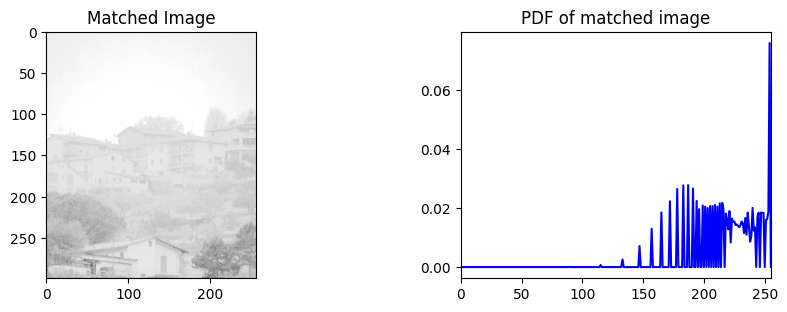

In [ ]:
# ===============================
# (3) Histogram matching
# ===============================

# ADD YOUR CODE HERE

# 3.1 write a function to match the histogram of one image to that of another image
def matchHistogram( imgSource, imgTarget):

    # calculate the histogram matched image here
    histTarget= calcHistogram(imgTarget)
    histSource= calcHistogram(imgSource)
    pdfTarget= histTarget/histTarget.sum()
    pdfSource= histSource/histSource.sum()

    cdfTarget= np.cumsum(pdfTarget)
    cdfSource= np.cumsum(pdfSource)

    mappingFunc= np.interp(cdfSource, cdfTarget, np.arange(256))

    # Apply the mapping to the source image
    matched= mappingFunc[imgSource]

    imgMatched= matched.astype('uint8')

    return imgMatched

# end of function

# 3.2 obtain the histogram matched image using the above function
my_img_matched= matchHistogram(img_low, img_high)

# 3.3 calculate the pdf of the histogram matched image
histMatched = calcHistogram(my_img_matched)
pdfMatched = histMatched / histMatched.sum()

# 3.4 display the histogram matched image and its pdf
plt.figure(figsize=(10, 8))

plt.subplot(221), plt.imshow(my_img_matched,cmap='gray',vmin=0,vmax=255)
plt.xlim(0, 255)
plt.title('Matched Image')

plt.subplot(222), plt.plot(pdfMatched, 'blue')
plt.xlim(0, 255)
plt.title('PDF of matched image')


plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()
plt.close()

*STEP 4 Comments on the results*

*ADD YOUR COMMENTS HERE*

(a) Compare the histogram equalized images obtained in Step 2 with the original images in Step 1. Comment on any improvements in the visual quality.

In step 1, images have low or high exposure. In other words, have low contrast (short range color band). Therefore, they are hard to observe. We equalized the number of pixel for each color band. This way we managed to increase the contrast of images.


(b) Comment on the appearance of the histogram matched image obtained in Step 3. Why would one  use histogram matching?

Image in step 3 has high exposure. We converted the image from low exposure to high exposure since we determined the high exposure image as target. By using histogram matching method, we can obtain a different version of the image which looks like the target image.


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/My Drive/Colab Notebooks/Prj02_Enhancement_S025235.ipynb'